In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from catboost import CatBoostRegressor
import math
import shap

import import_ipynb
from Preprocessing import pre_buy_num, pre_buy_amount_round, data_split

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'Batang'

importing Jupyter notebook from Preprocessing.ipynb


In [2]:
df, regressor, pred, shap_explainer, shap_values, X_train, X_test, y_train, y_test = [[0 for i in range(4)] for h in range(9)]
rand_num = [[], [], [], []]

# 1번 주제: 총 구매횟수

In [3]:
df[0], df[1], df[2], df[3] = pre_buy_num()

In [4]:
learning_rate = [0.5, 0.5, 0.1, 0.1]
for i in range(4):
    X_train[i], X_test[i], y_train[i], y_test[i] = data_split(df[i])
    regressor[i] = CatBoostRegressor(max_depth = 11, learning_rate = learning_rate[i], random_state=2022, silent=True)
    regressor[i].fit(X_train[i],y_train[i])
    pred[i] = regressor[i].predict(X_test[i])
    shap_explainer[i] = shap.TreeExplainer(regressor[i])
    shap_values[i] = shap_explainer[i].shap_values(X_test[i])
    for j in range(3):
        rand_num[i].append(random.randint(0,len(X_test[i])))

# shap summary_plot

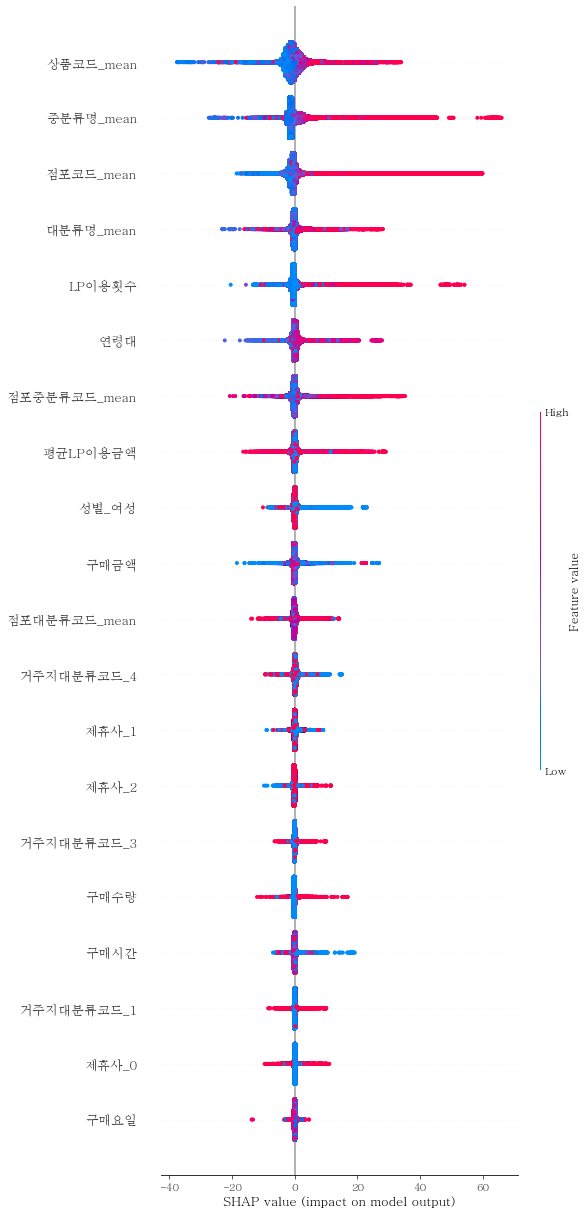

In [5]:
shap.summary_plot(shap_values[0], X_test[0].astype("float"),feature_names = X_test[0].columns ,plot_size = 1.0)

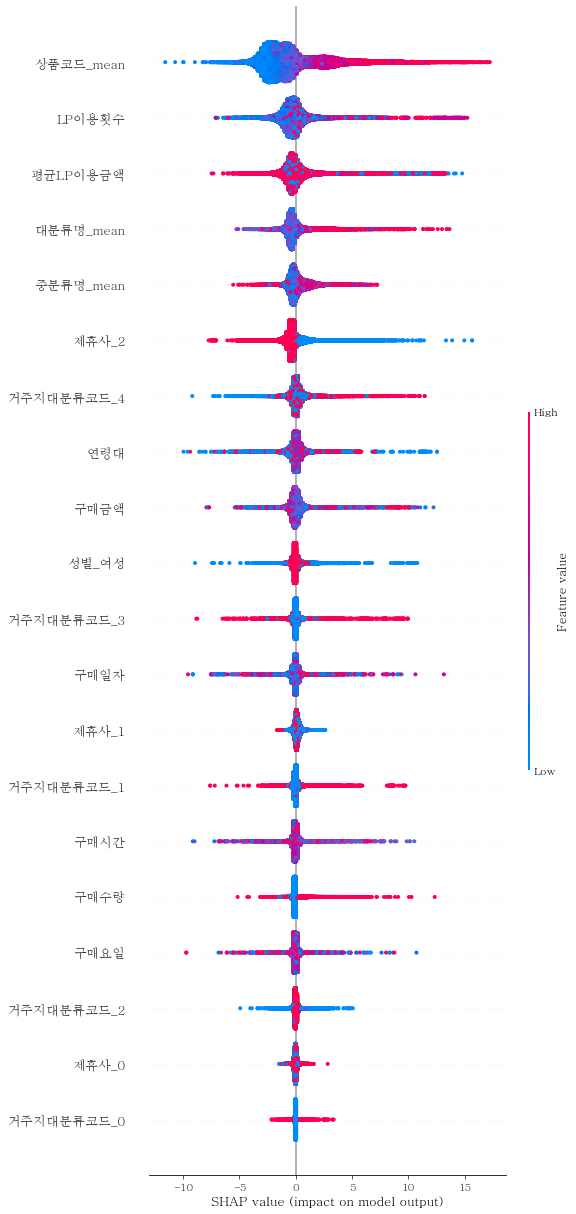

In [6]:
shap.summary_plot(shap_values[1], X_test[1].astype("float"),feature_names = X_test[1].columns ,plot_size = 1.0)

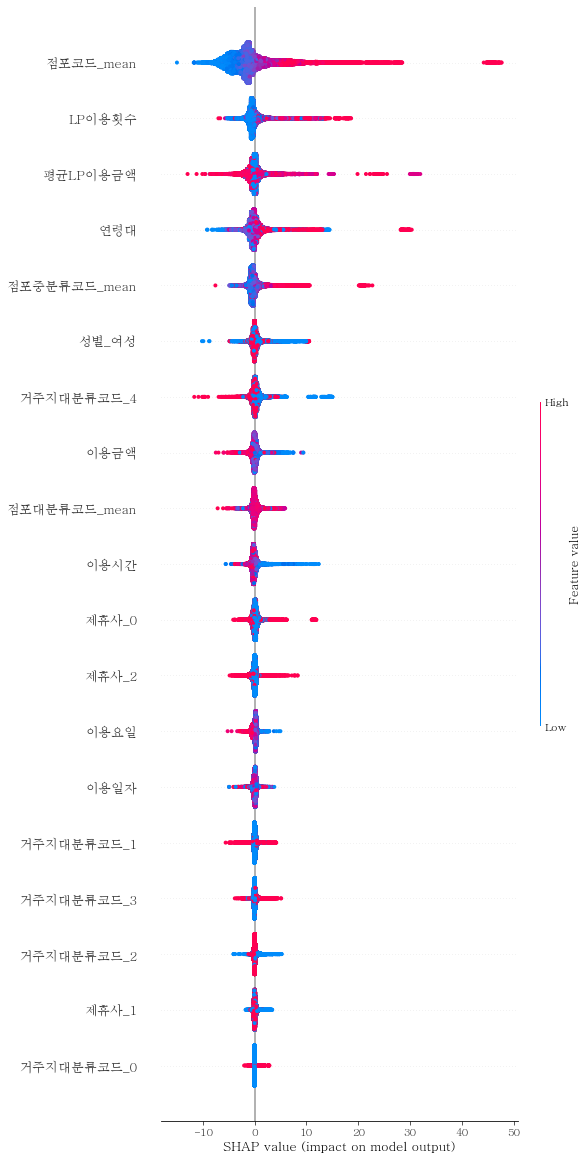

In [7]:
shap.summary_plot(shap_values[2], X_test[2].astype("float"),feature_names = X_test[2].columns ,plot_size = 1.0)

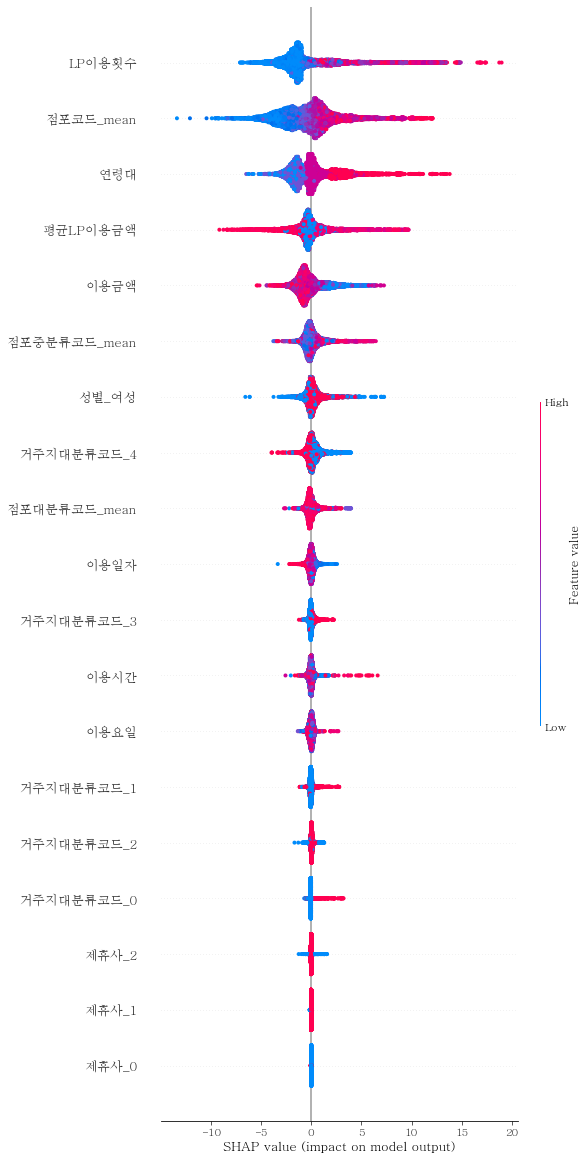

In [8]:
shap.summary_plot(shap_values[3], X_test[3].astype("float"),feature_names = X_test[3].columns ,plot_size = 1.0)

# Data02_offline

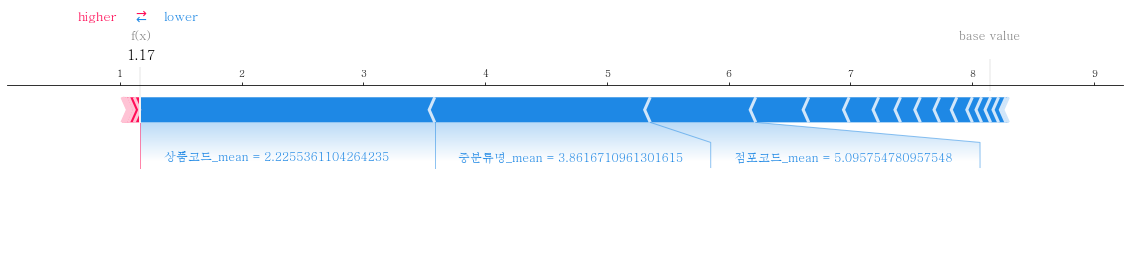

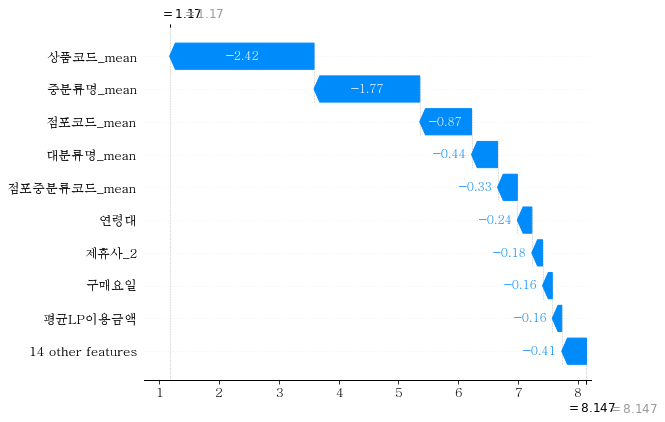

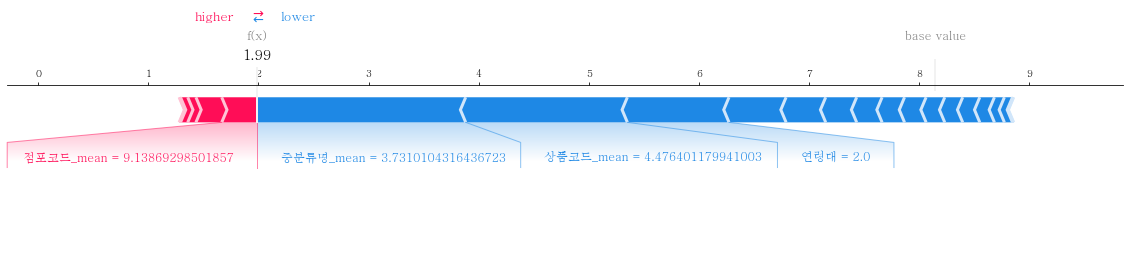

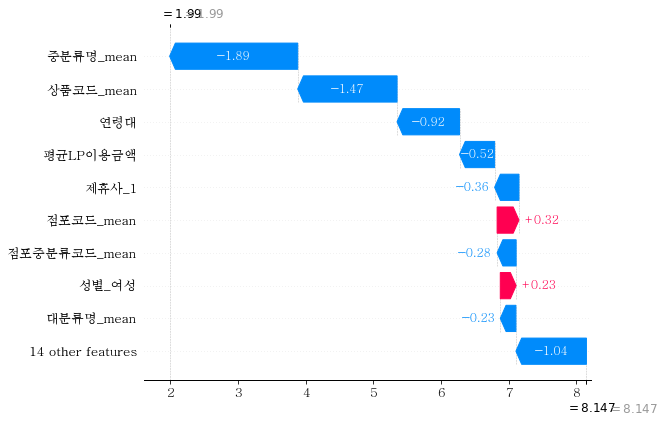

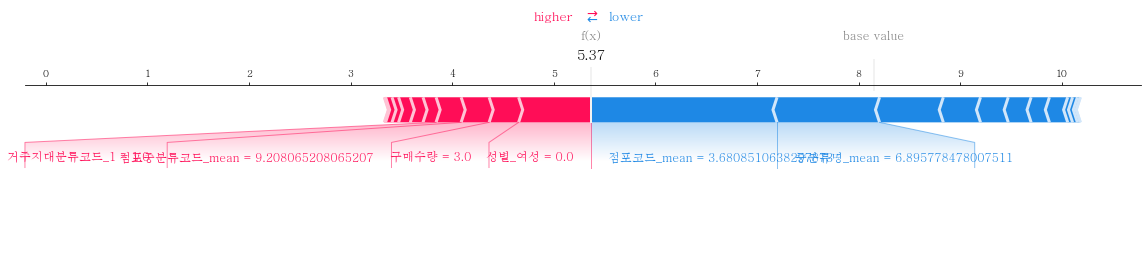

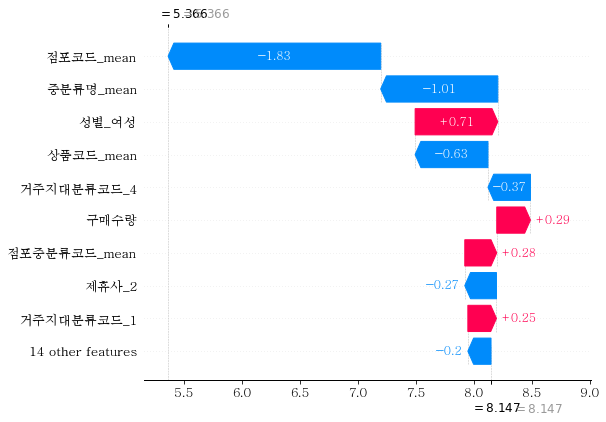

In [9]:
shap.initjs()
shap.force_plot(shap_explainer[0].expected_value, shap_values[0][rand_num[0][0], :], X_test[0].iloc[rand_num[0][0], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[0].expected_value, shap_values[0][rand_num[0][0]],feature_names = X_test[0].columns)
shap.force_plot(shap_explainer[0].expected_value, shap_values[0][rand_num[0][1], :], X_test[0].iloc[rand_num[0][1], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[0].expected_value, shap_values[0][rand_num[0][1]],feature_names = X_test[0].columns)
shap.force_plot(shap_explainer[0].expected_value, shap_values[0][rand_num[0][2], :], X_test[0].iloc[rand_num[0][2], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[0].expected_value, shap_values[0][rand_num[0][2]],feature_names = X_test[0].columns)

# Data02_Online

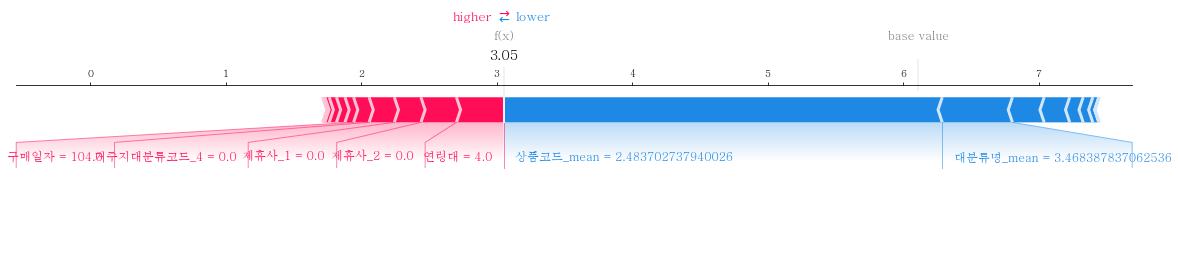

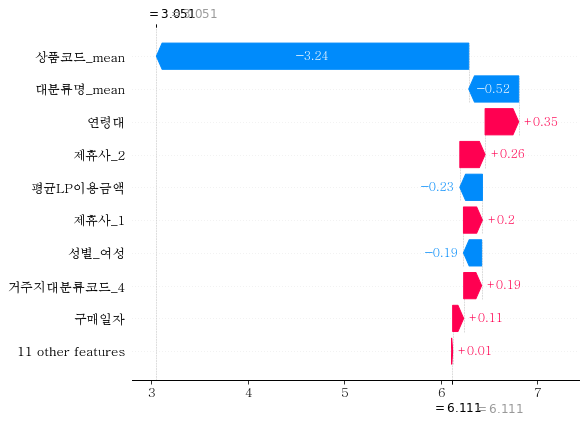

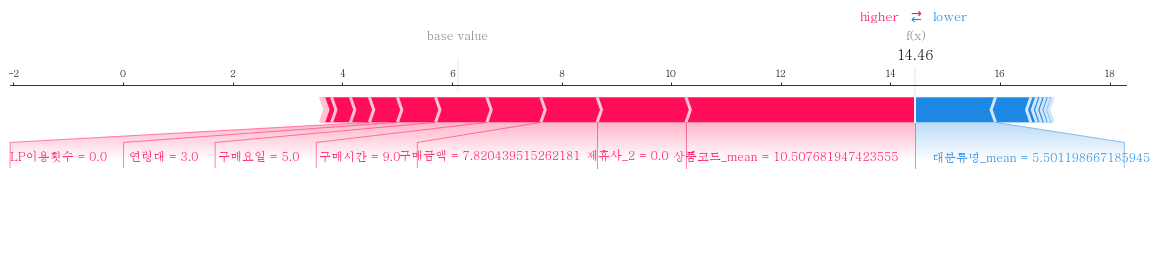

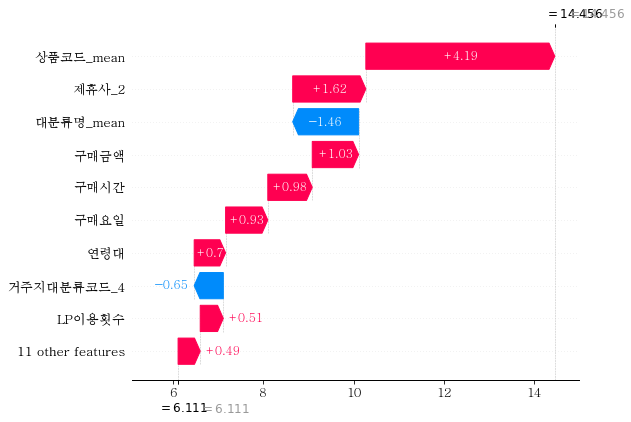

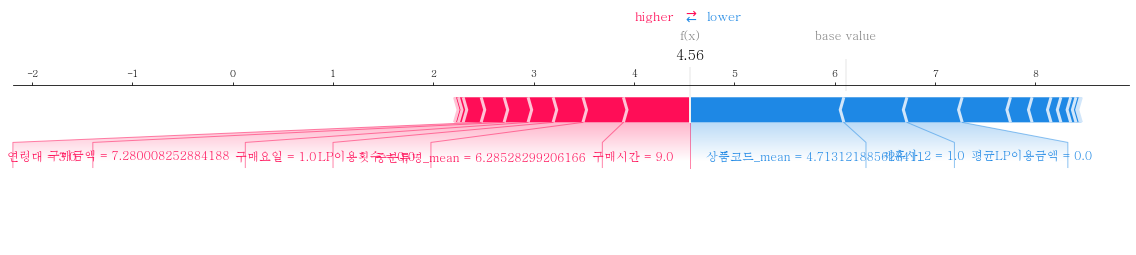

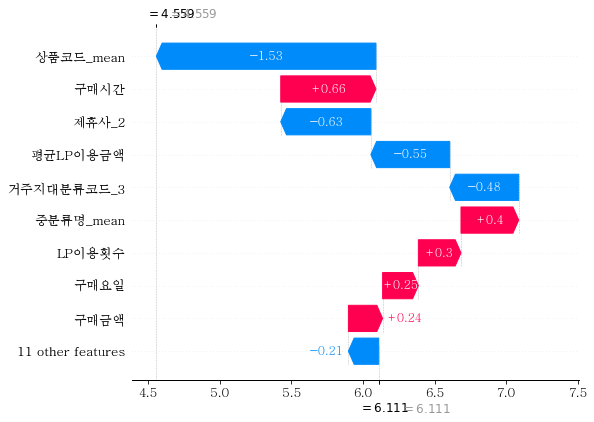

In [10]:
shap.force_plot(shap_explainer[1].expected_value, shap_values[1][rand_num[1][0], :], X_test[1].iloc[rand_num[1][0], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[1].expected_value, shap_values[1][rand_num[1][0]],feature_names = X_test[1].columns)
shap.force_plot(shap_explainer[1].expected_value, shap_values[1][rand_num[1][1], :], X_test[1].iloc[rand_num[1][1], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[1].expected_value, shap_values[1][rand_num[1][1]],feature_names = X_test[1].columns)
shap.force_plot(shap_explainer[1].expected_value, shap_values[1][rand_num[1][2], :], X_test[1].iloc[rand_num[1][2], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[1].expected_value, shap_values[1][rand_num[1][2]],feature_names = X_test[1].columns)

# Data03_offline

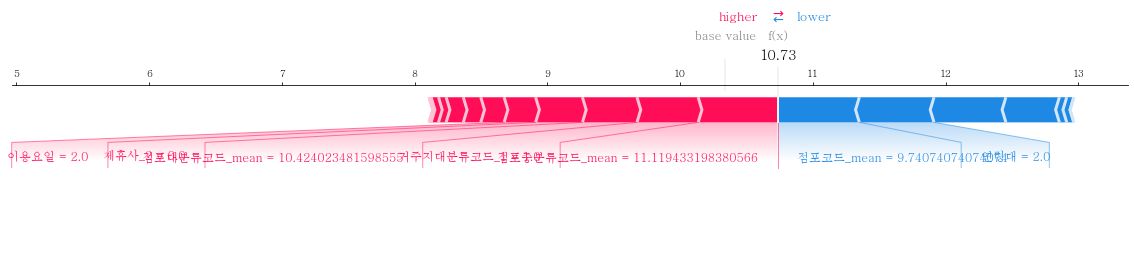

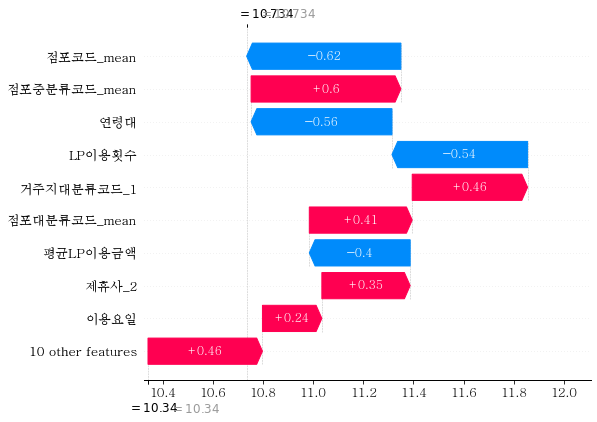

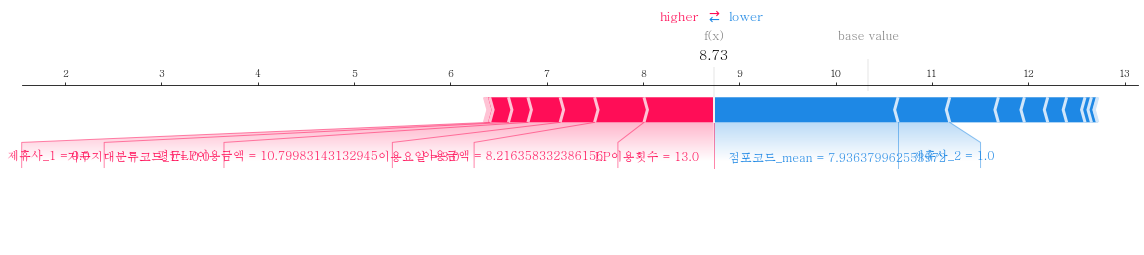

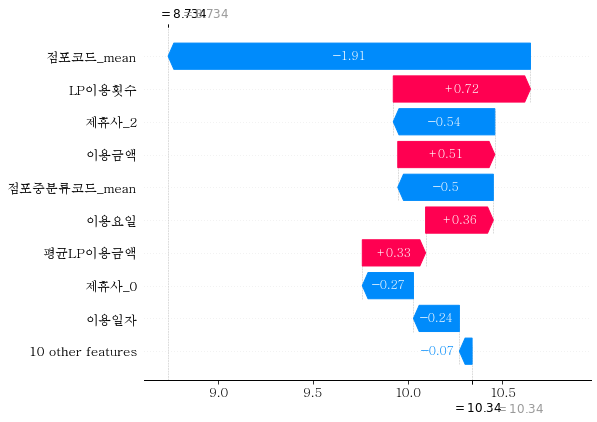

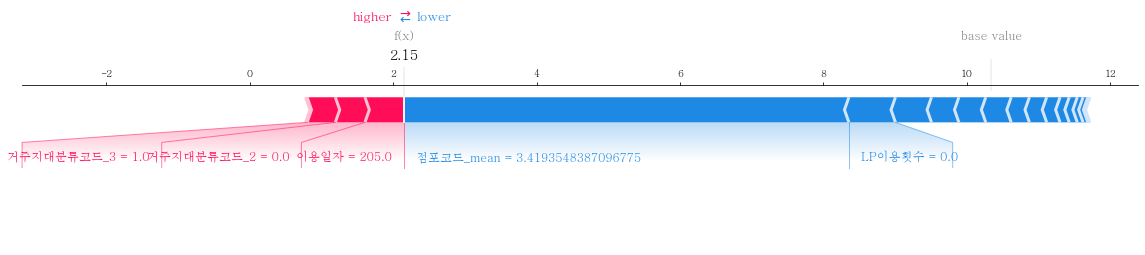

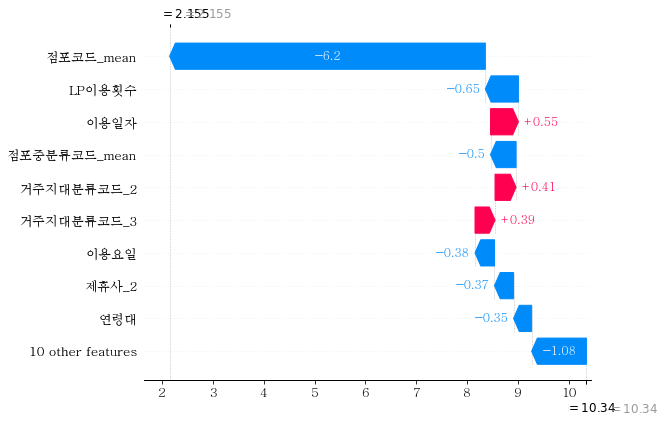

In [11]:
shap.force_plot(shap_explainer[2].expected_value, shap_values[2][rand_num[2][0], :], X_test[2].iloc[rand_num[2][0], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[2].expected_value, shap_values[2][rand_num[2][0]],feature_names = X_test[2].columns)
shap.force_plot(shap_explainer[2].expected_value, shap_values[2][rand_num[2][1], :], X_test[2].iloc[rand_num[2][1], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[2].expected_value, shap_values[2][rand_num[2][1]],feature_names = X_test[2].columns)
shap.force_plot(shap_explainer[2].expected_value, shap_values[2][rand_num[2][2], :], X_test[2].iloc[rand_num[2][2], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[2].expected_value, shap_values[2][rand_num[2][2]],feature_names = X_test[2].columns)

# Data03_Online

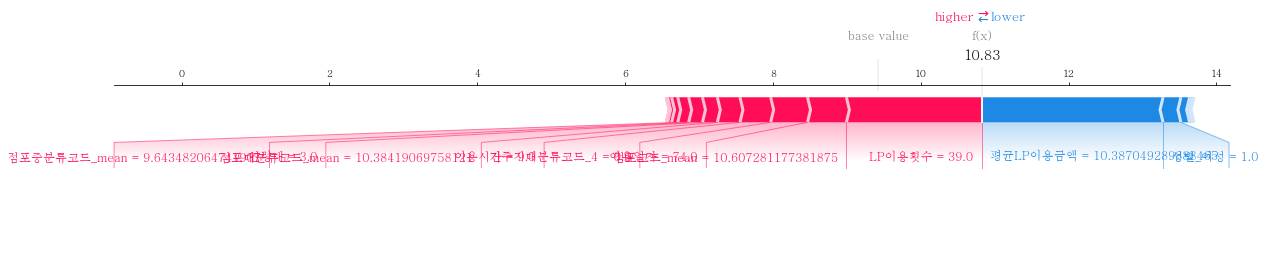

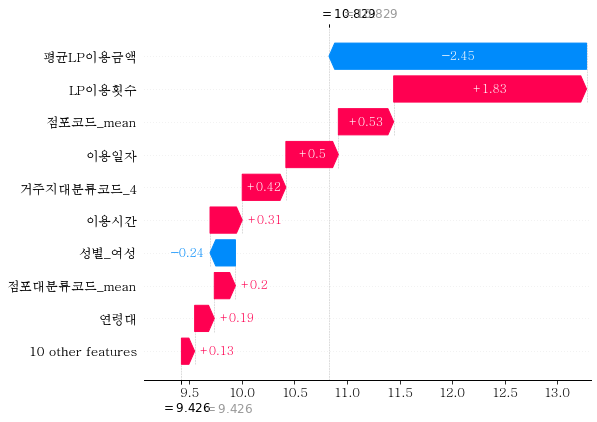

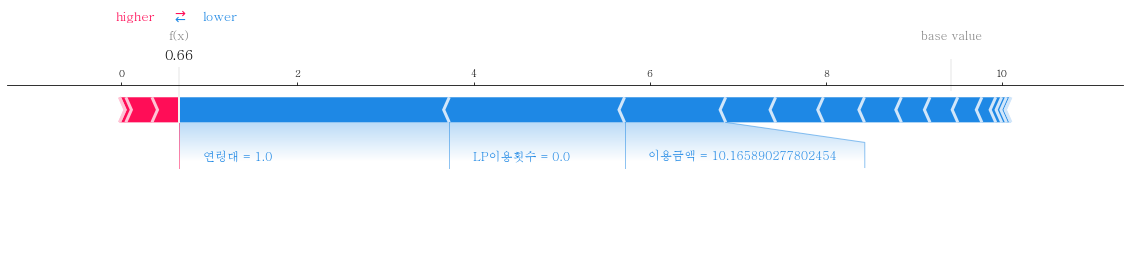

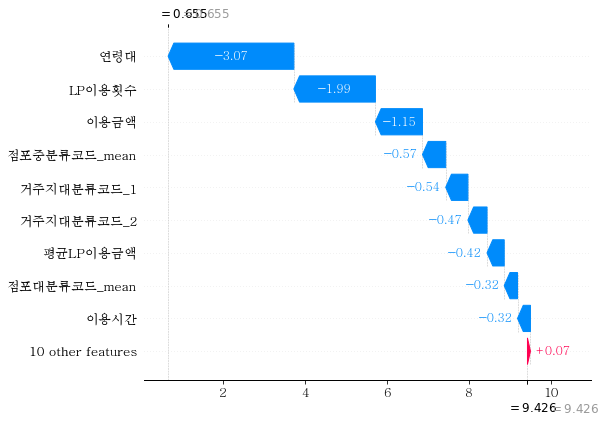

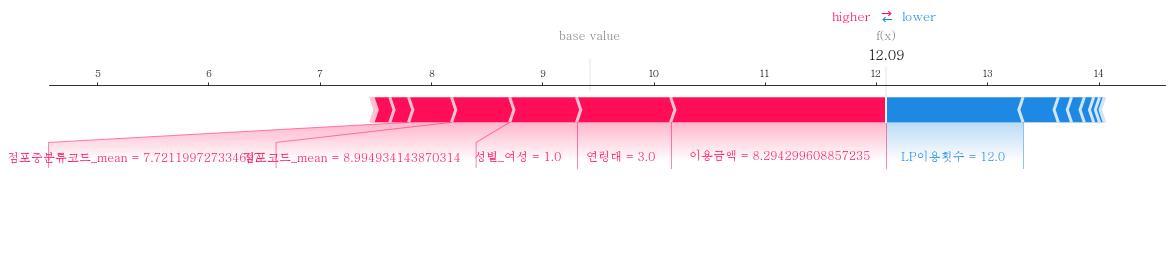

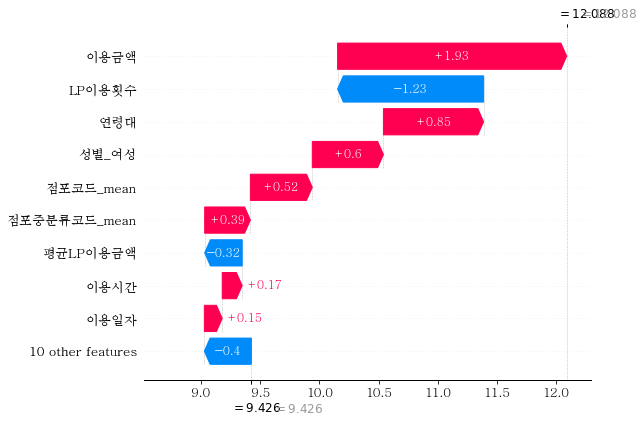

In [12]:
shap.force_plot(shap_explainer[3].expected_value, shap_values[3][rand_num[3][0], :], X_test[3].iloc[rand_num[3][0], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[3].expected_value, shap_values[3][rand_num[3][0]],feature_names = X_test[3].columns)
shap.force_plot(shap_explainer[3].expected_value, shap_values[3][rand_num[3][1], :], X_test[3].iloc[rand_num[3][1], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[3].expected_value, shap_values[3][rand_num[3][1]],feature_names = X_test[3].columns)
shap.force_plot(shap_explainer[3].expected_value, shap_values[3][rand_num[3][2], :], X_test[3].iloc[rand_num[3][2], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[3].expected_value, shap_values[3][rand_num[3][2]],feature_names = X_test[3].columns)

# 2번 주제: 총 구매금액

In [13]:
df[0], df[1], df[2], df[3] = pre_buy_amount_round()

In [14]:
learning_rate = [0.5, 0.5, 0.5, 0.1]
for i in range(4):
    X_train[i], X_test[i], y_train[i], y_test[i] = data_split(df[i])
    regressor[i] = CatBoostRegressor(max_depth = 11, learning_rate = learning_rate[i], random_state=2022, silent=True)
    regressor[i].fit(X_train[i],y_train[i])
    pred[i] = regressor[i].predict(X_test[i])
    shap_explainer[i] = shap.TreeExplainer(regressor[i])
    shap_values[i] = shap_explainer[i].shap_values(X_test[i])
    for j in range(3):
        rand_num[i].append(random.randint(0,len(X_test[i])))

# shap summary_plot

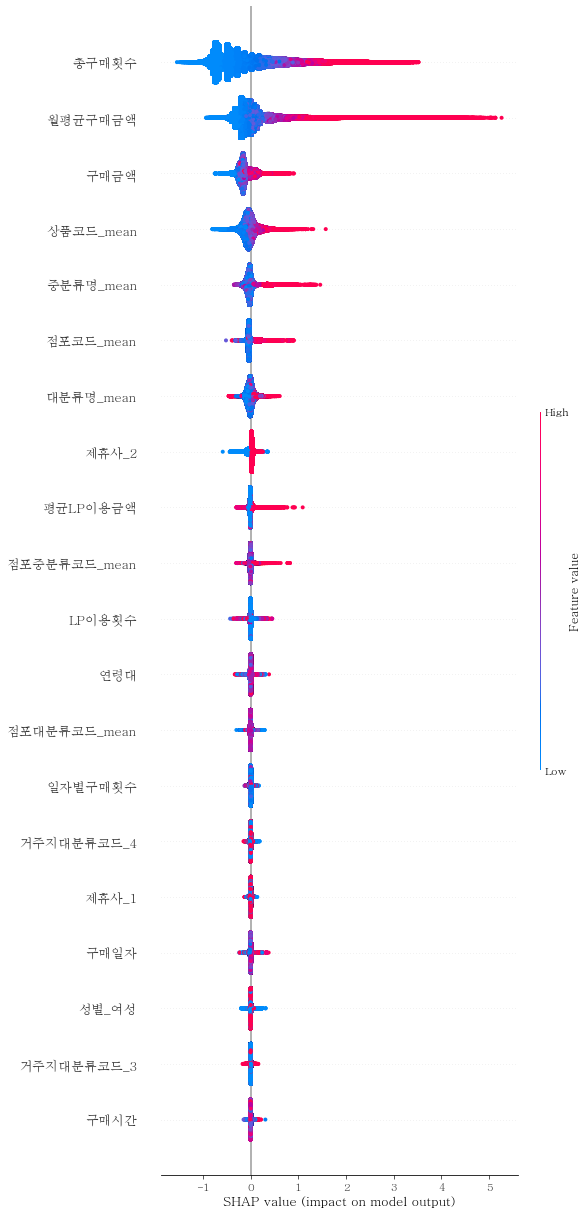

In [15]:
shap.summary_plot(shap_values[0], X_test[0].astype("float"),feature_names = X_test[0].columns ,plot_size = 1.0)

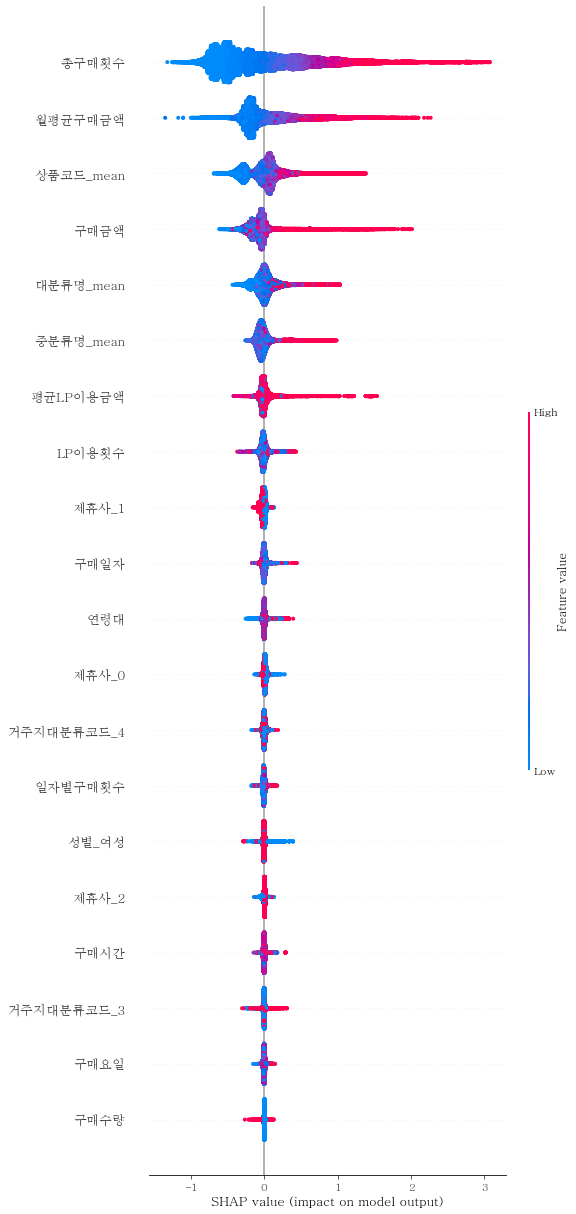

In [16]:
shap.summary_plot(shap_values[1], X_test[1].astype("float"),feature_names = X_test[1].columns ,plot_size = 1.0)

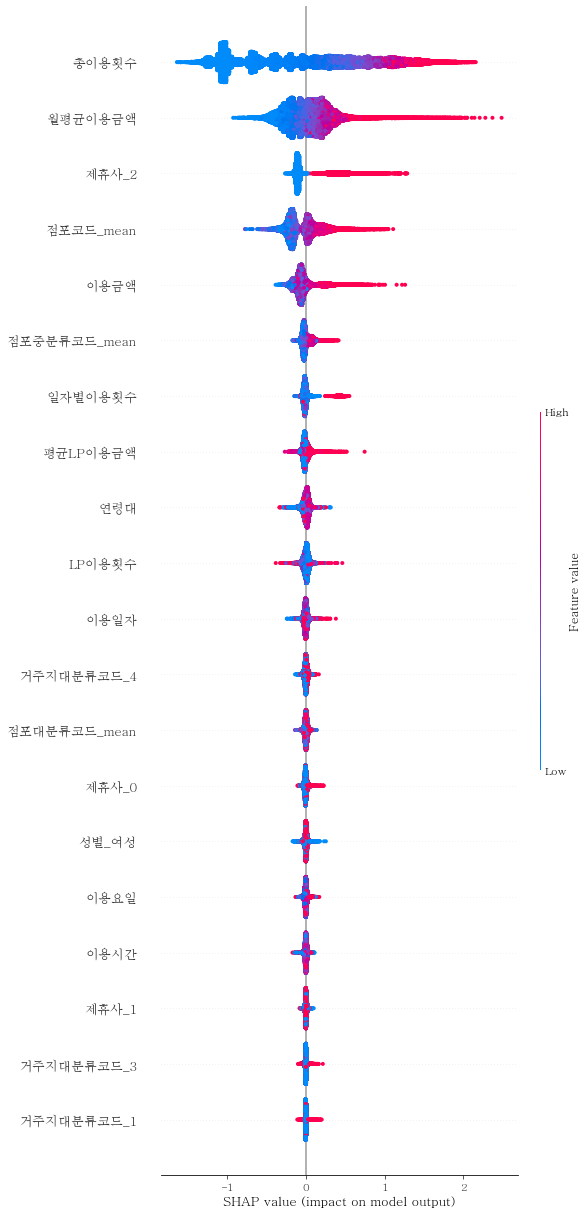

In [17]:
shap.summary_plot(shap_values[2], X_test[2].astype("float"),feature_names = X_test[2].columns ,plot_size = 1.0)

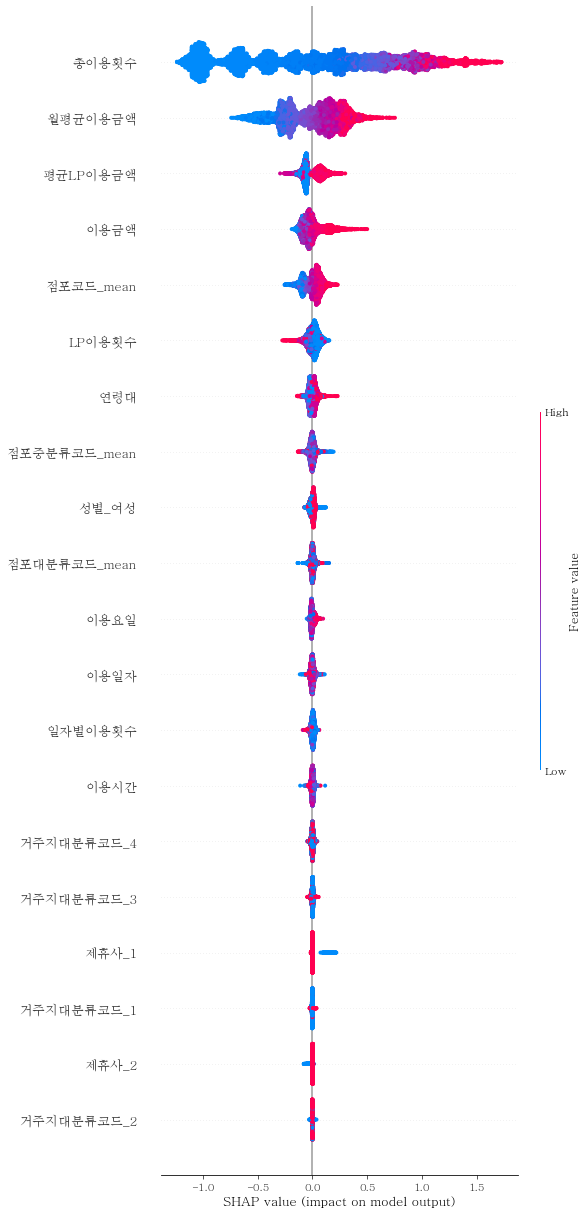

In [18]:
shap.summary_plot(shap_values[3], X_test[3].astype("float"),feature_names = X_test[3].columns ,plot_size = 1.0)

# Data02_offline

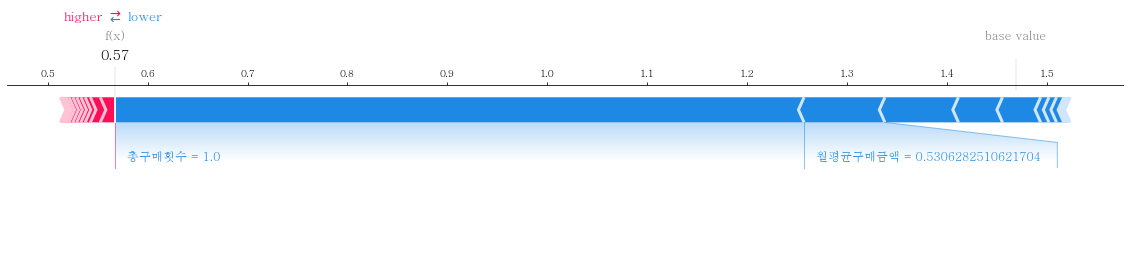

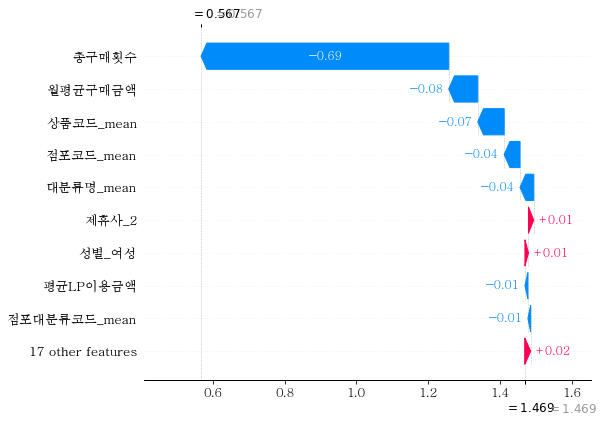

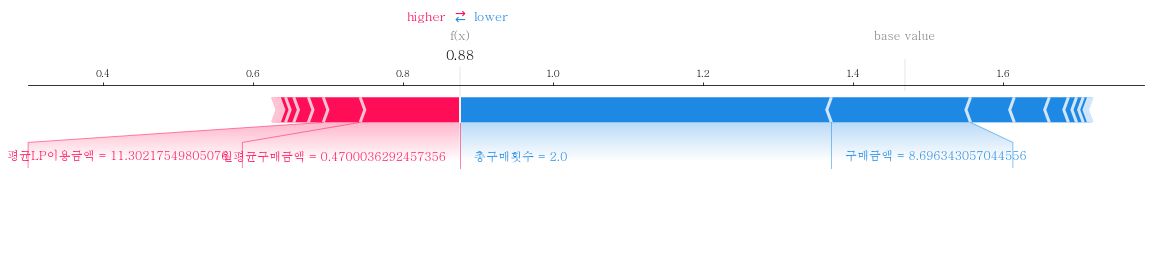

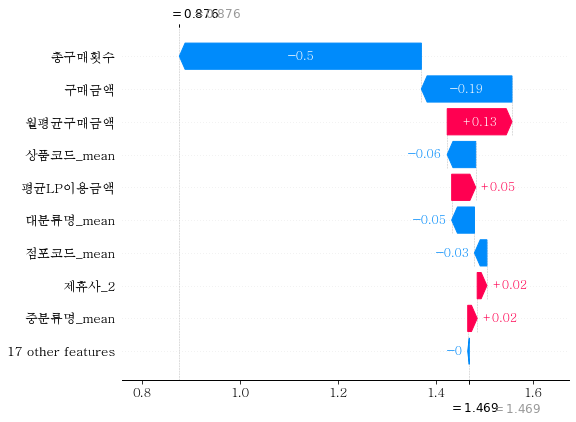

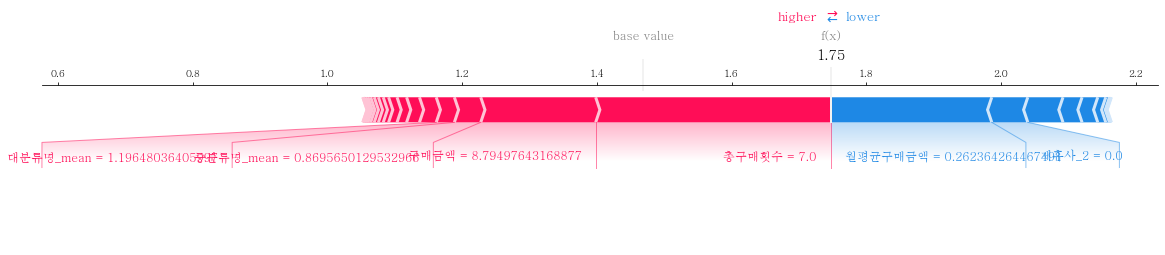

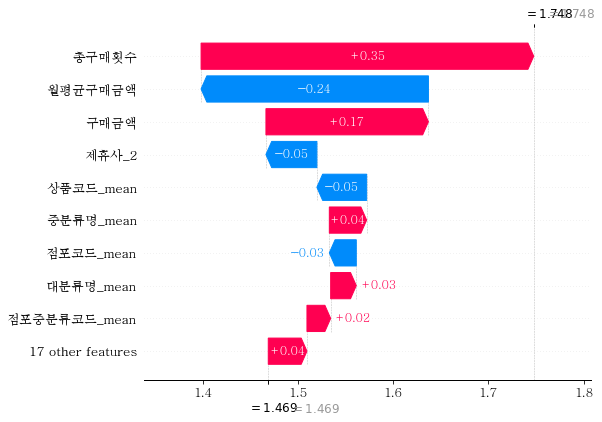

In [19]:
shap.initjs()
shap.force_plot(shap_explainer[0].expected_value, shap_values[0][rand_num[0][0], :], X_test[0].iloc[rand_num[0][0], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[0].expected_value, shap_values[0][rand_num[0][0]],feature_names = X_test[0].columns)
shap.force_plot(shap_explainer[0].expected_value, shap_values[0][rand_num[0][1], :], X_test[0].iloc[rand_num[0][1], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[0].expected_value, shap_values[0][rand_num[0][1]],feature_names = X_test[0].columns)
shap.force_plot(shap_explainer[0].expected_value, shap_values[0][rand_num[0][2], :], X_test[0].iloc[rand_num[0][2], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[0].expected_value, shap_values[0][rand_num[0][2]],feature_names = X_test[0].columns)

# Data02_Online

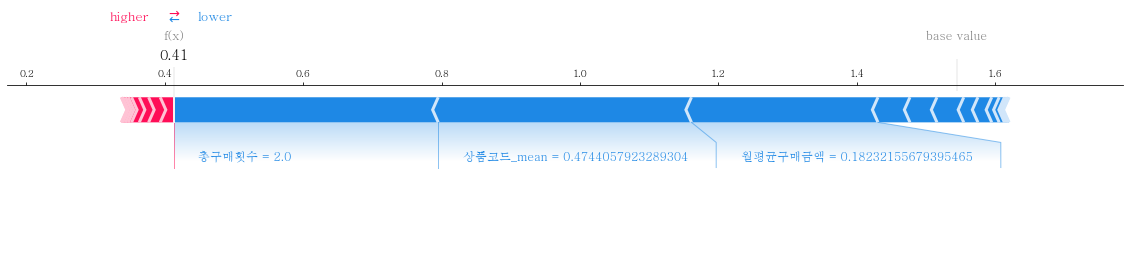

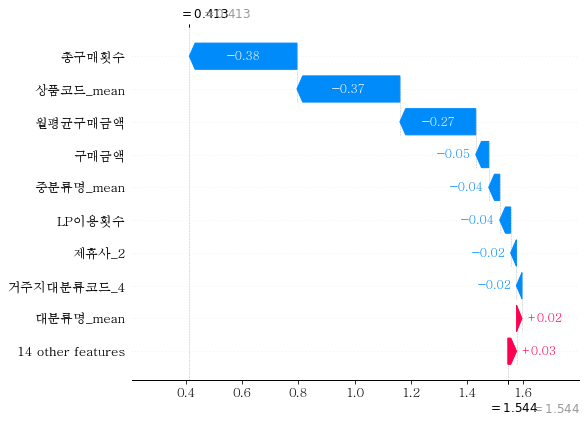

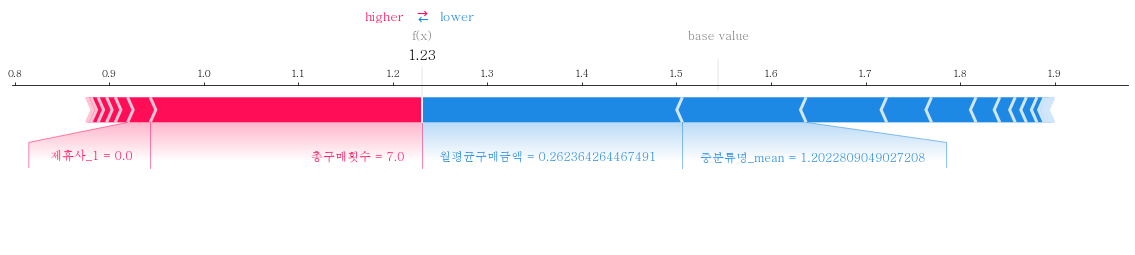

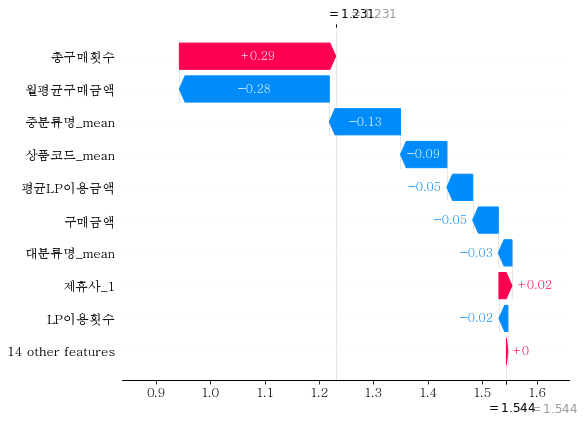

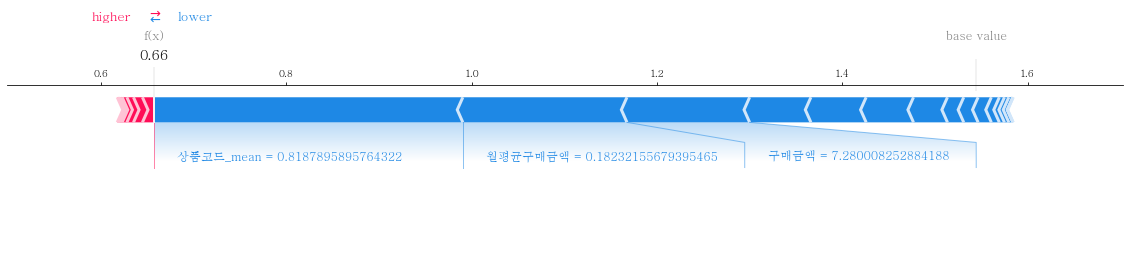

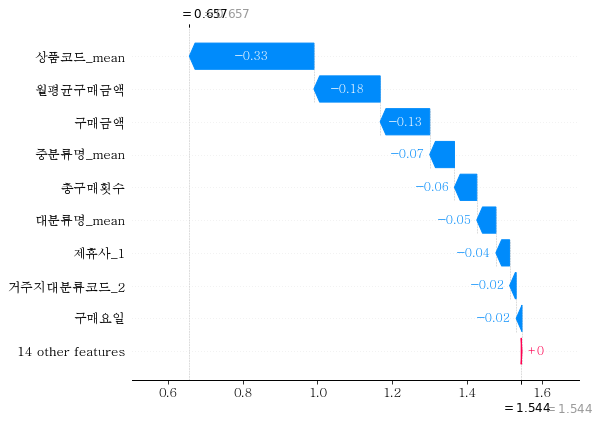

In [20]:
shap.force_plot(shap_explainer[1].expected_value, shap_values[1][rand_num[1][0], :], X_test[1].iloc[rand_num[1][0], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[1].expected_value, shap_values[1][rand_num[1][0]],feature_names = X_test[1].columns)
shap.force_plot(shap_explainer[1].expected_value, shap_values[1][rand_num[1][1], :], X_test[1].iloc[rand_num[1][1], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[1].expected_value, shap_values[1][rand_num[1][1]],feature_names = X_test[1].columns)
shap.force_plot(shap_explainer[1].expected_value, shap_values[1][rand_num[1][2], :], X_test[1].iloc[rand_num[1][2], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[1].expected_value, shap_values[1][rand_num[1][2]],feature_names = X_test[1].columns)

# Data03_offline

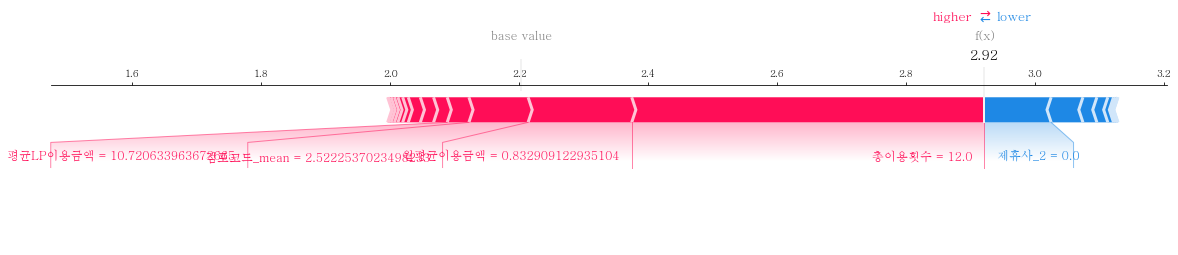

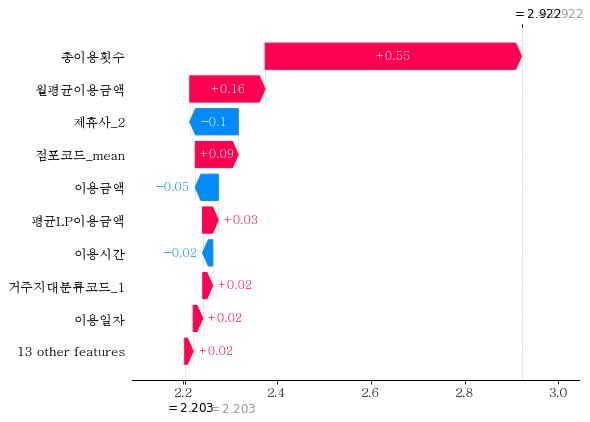

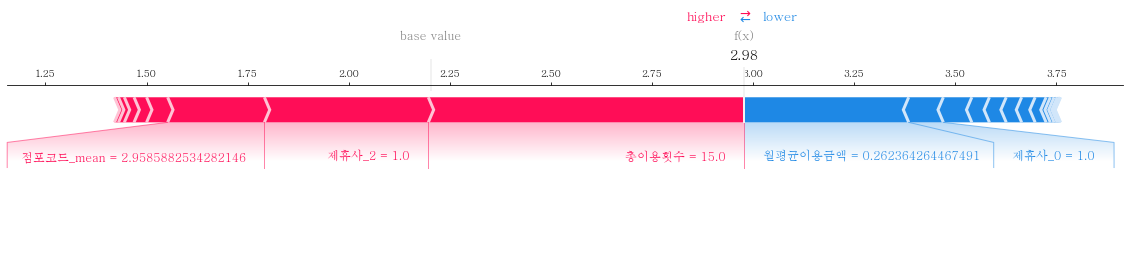

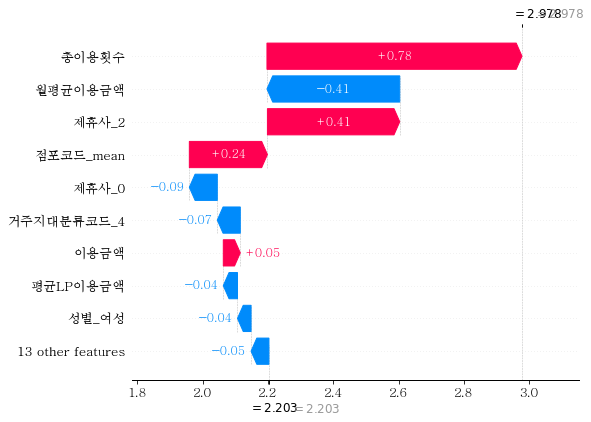

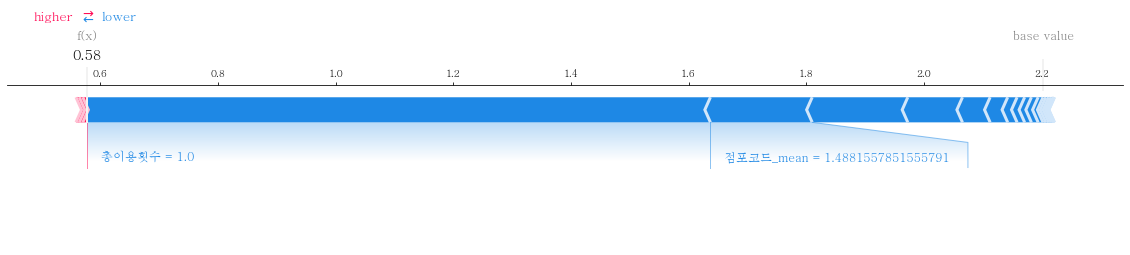

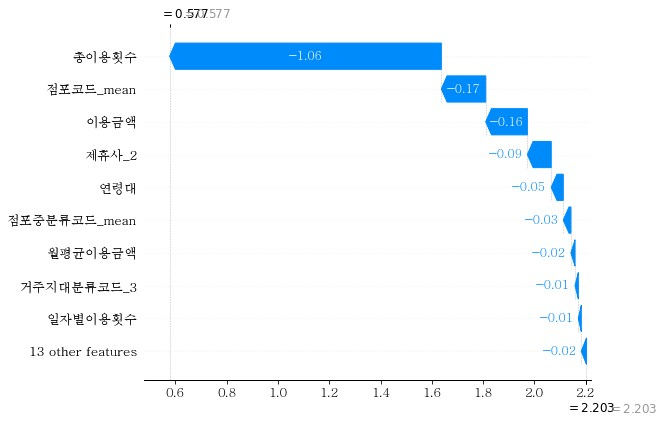

In [21]:
shap.force_plot(shap_explainer[2].expected_value, shap_values[2][rand_num[2][0], :], X_test[2].iloc[rand_num[2][0], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[2].expected_value, shap_values[2][rand_num[2][0]],feature_names = X_test[2].columns)
shap.force_plot(shap_explainer[2].expected_value, shap_values[2][rand_num[2][1], :], X_test[2].iloc[rand_num[2][1], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[2].expected_value, shap_values[2][rand_num[2][1]],feature_names = X_test[2].columns)
shap.force_plot(shap_explainer[2].expected_value, shap_values[2][rand_num[2][2], :], X_test[2].iloc[rand_num[2][2], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[2].expected_value, shap_values[2][rand_num[2][2]],feature_names = X_test[2].columns)

# Data03_Online

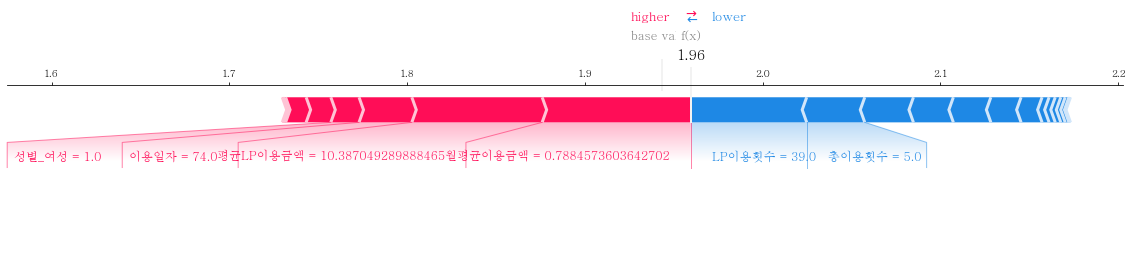

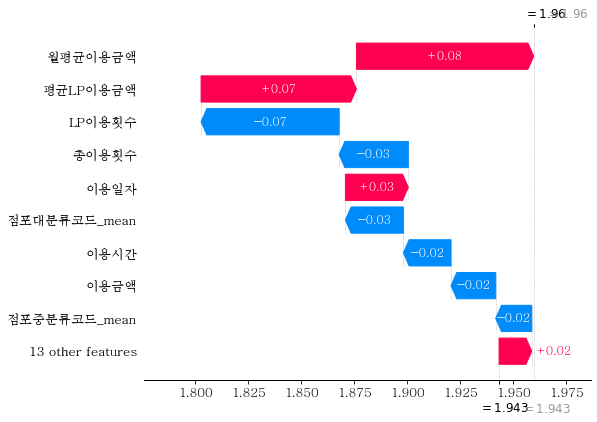

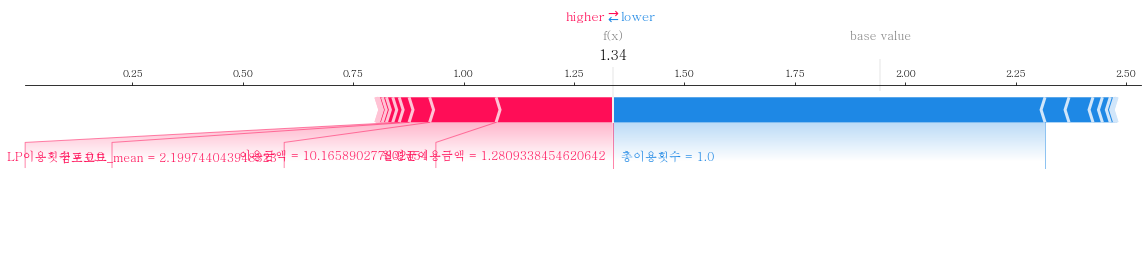

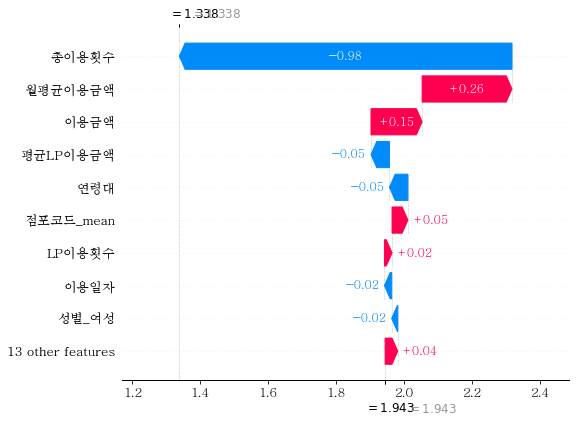

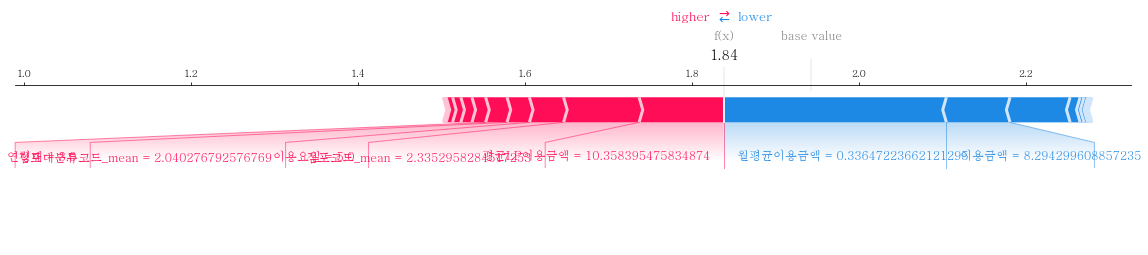

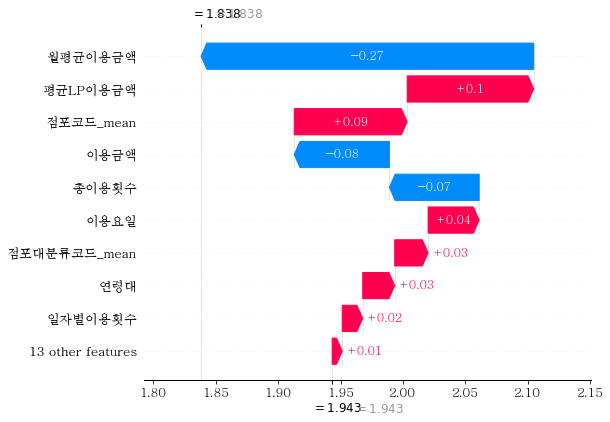

In [22]:
shap.force_plot(shap_explainer[3].expected_value, shap_values[3][rand_num[3][0], :], X_test[3].iloc[rand_num[3][0], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[3].expected_value, shap_values[3][rand_num[3][0]],feature_names = X_test[3].columns)
shap.force_plot(shap_explainer[3].expected_value, shap_values[3][rand_num[3][1], :], X_test[3].iloc[rand_num[3][1], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[3].expected_value, shap_values[3][rand_num[3][1]],feature_names = X_test[3].columns)
shap.force_plot(shap_explainer[3].expected_value, shap_values[3][rand_num[3][2], :], X_test[3].iloc[rand_num[3][2], :],matplotlib = True)
shap.plots._waterfall.waterfall_legacy(shap_explainer[3].expected_value, shap_values[3][rand_num[3][2]],feature_names = X_test[3].columns)